In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('house_rental_data.csv.txt')
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [5]:
X = data.iloc[:,1:]

In [6]:
kmean = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1)
kmean.fit_predict(X)

array([3, 0, 3, 1, 1, 4, 3, 3, 1, 3, 1, 1, 1, 3, 3, 0, 3, 1, 0, 1, 4, 0,
       3, 0, 2, 0, 2, 4, 1, 1, 3, 0, 3, 3, 1, 3, 1, 3, 2, 1, 4, 3, 1, 3,
       3, 3, 3, 0, 2, 1, 0, 3, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 3, 1, 0, 1, 3, 1, 1, 3, 1, 1, 4, 3,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 4, 4, 0, 0, 1, 3, 0,
       3, 3, 0, 3, 0, 3, 4, 1, 1, 1, 3, 3, 3, 0, 4, 3, 3, 0, 1, 1, 0, 3,
       0, 1, 0, 3, 1, 0, 0, 0, 4, 3, 3, 1, 1, 1, 0, 2, 1, 3, 0, 0, 3, 3,
       1, 1, 3, 3, 1, 1, 3, 1, 1, 2, 1, 0, 0, 0, 3, 1, 3, 0, 0, 4, 1, 0,
       0, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1,
       1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 3, 4, 1, 0,
       3, 3, 0, 1, 4, 1, 1, 1, 0, 3, 0, 0, 0, 0, 3, 1, 3, 3, 1, 3, 1, 3,
       4, 3, 4, 3, 4, 3, 4, 1, 0, 3, 3, 3, 1, 1, 0, 1, 3, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 3, 3, 1, 0, 3,
       2, 0, 1, 0, 3, 1, 4, 1, 3, 3, 0, 0, 0, 2, 3,

In [7]:
wcss = []
for i in range(1, 15):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    k_means.fit_predict(X)
    wcss.append(k_means.inertia_)
    print("i=", i, "wcss=", k_means.inertia_)

i= 1 wcss= 818168920887.3367
i= 2 wcss= 280633054694.48474
i= 3 wcss= 127250665826.54985
i= 4 wcss= 80767226715.33643
i= 5 wcss= 54475740578.55669
i= 6 wcss= 36632378151.93903
i= 7 wcss= 27456845173.33084
i= 8 wcss= 22270593778.067863
i= 9 wcss= 18371385406.458515
i= 10 wcss= 14736466074.179863
i= 11 wcss= 11763102312.449091
i= 12 wcss= 9932363459.202938
i= 13 wcss= 8460242761.235023
i= 14 wcss= 6937357688.740618


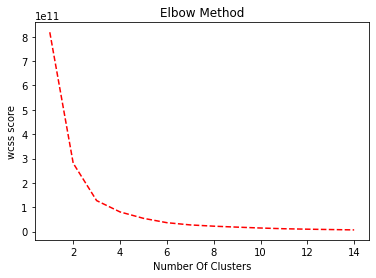

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(1,15), wcss,'r--')
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('wcss score')
plt.show()